# LAB3 - MNIST Dataset
## Pré-processamento de dados
### Transformação lineares: PCA e LDA

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
import scipy.linalg as la
import sklearn.datasets as ds

#### Pré-processamento de dados

In [171]:
import sklearn.preprocessing as pp
D = ds.load_iris()
X = D.data
y = D.target
X.shape

(150, 4)

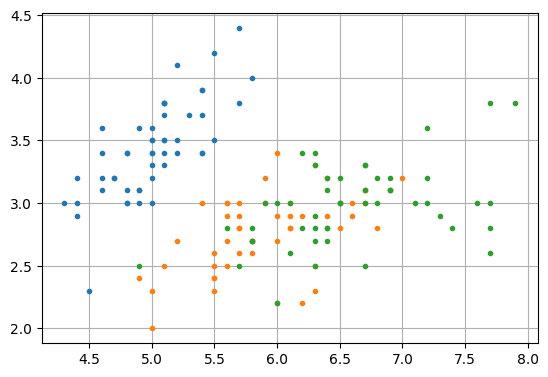

In [172]:
plt.plot(X[y==0,0],X[y==0,1],'.')
plt.plot(X[y==1,0],X[y==1,1],'.')
plt.plot(X[y==2,0],X[y==2,1],'.')
plt.axis('scaled')
plt.grid(True)

In [173]:
print(np.mean(X,axis=0))
print(np.std(X,axis=0))

[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


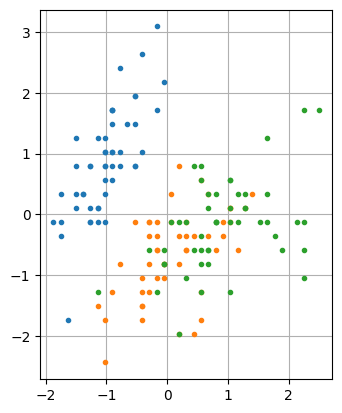

In [174]:
sc = pp.StandardScaler().fit(X)
Xn = sc.transform(X)
plt.plot(Xn[y==0,0],Xn[y==0,1],'.')
plt.plot(Xn[y==1,0],Xn[y==1,1],'.')
plt.plot(Xn[y==2,0],Xn[y==2,1],'.')
plt.axis('scaled')
plt.grid(True)
print(np.mean(X,axis=0))
print(np.std(X,axis=0))


[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


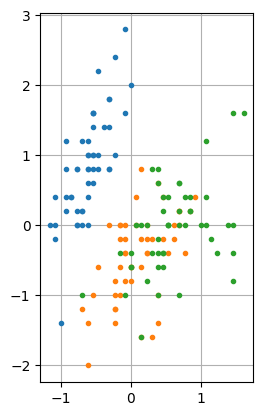

In [175]:
rs = pp.RobustScaler().fit(X)
Xn = rs.transform(X)
plt.plot(Xn[y==0,0],Xn[y==0,1],'.')
plt.plot(Xn[y==1,0],Xn[y==1,1],'.')
plt.plot(Xn[y==2,0],Xn[y==2,1],'.')
plt.axis('scaled')
plt.grid(True)
print(np.mean(X,axis=0))
print(np.std(X,axis=0))

[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


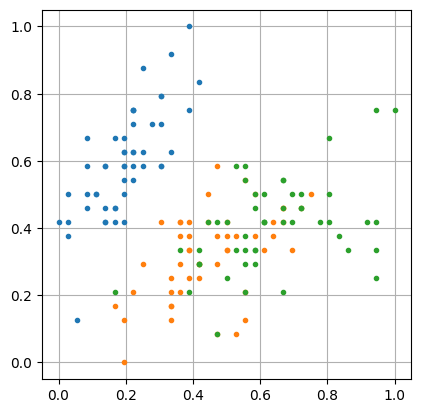

In [176]:
mm = pp.MinMaxScaler().fit(X)
Xn = mm.transform(X)
plt.plot(Xn[y==0,0],Xn[y==0,1],'.')
plt.plot(Xn[y==1,0],Xn[y==1,1],'.')
plt.plot(Xn[y==2,0],Xn[y==2,1],'.')
plt.axis('scaled')
plt.grid(True)
print(np.mean(X,axis=0))
print(np.std(X,axis=0))

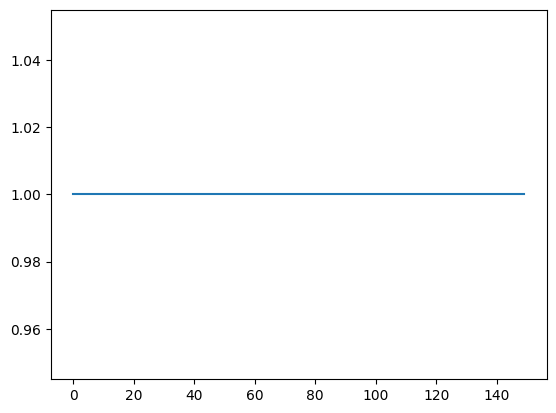

In [177]:
nn = pp.Normalizer().fit(X)
Xn = nn.transform(X)
nX = np.sqrt(np.sum(Xn**2,axis=1))
plt.plot(nX)

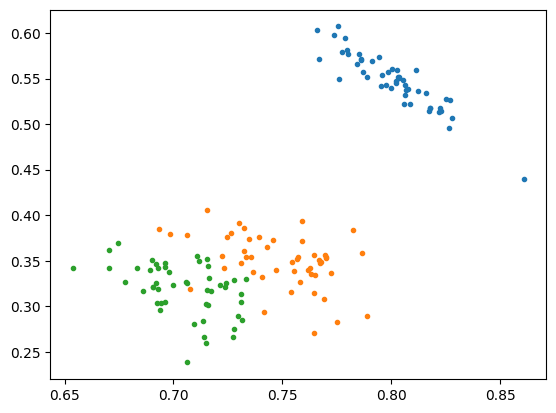

In [178]:
plt.plot(Xn[y==0,0],Xn[y==0,1],'.')
plt.plot(Xn[y==1,0],Xn[y==1,1],'.')
plt.plot(Xn[y==2,0],Xn[y==2,1],'.')


(-1.0, 1.0, -1.0, 1.0)

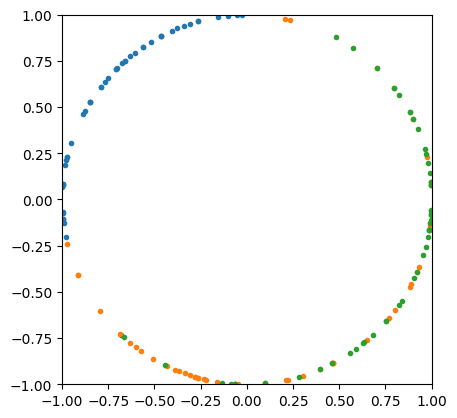

In [179]:
X2 = X[:,:2]
sc= pp.StandardScaler().fit(X2)
X2=sc.transform(X2)
nn=pp.Normalizer().fit(X2)
Xn=nn.transform(X2)
plt.plot(Xn[y==0,0],Xn[y==0,1],'.')
plt.plot(Xn[y==1,0],Xn[y==1,1],'.')
plt.plot(Xn[y==2,0],Xn[y==2,1],'.')
plt.axis('scaled')
plt.axis([-1,1,-1,1])

(-1.0, 1.0, -1.0, 1.0)

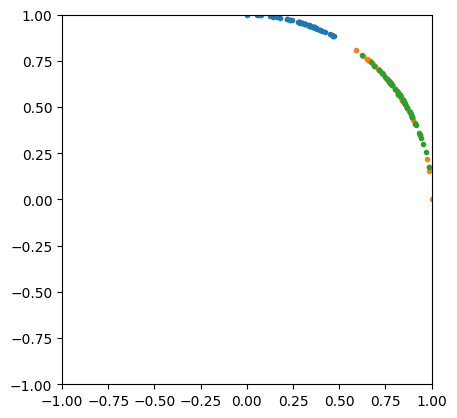

In [180]:
X2 = X[:,:2]
sc= pp.MinMaxScaler().fit(X2)
X2=sc.transform(X2)
nn=pp.Normalizer().fit(X2)
Xn=nn.transform(X2)
plt.plot(Xn[y==0,0],Xn[y==0,1],'.')
plt.plot(Xn[y==1,0],Xn[y==1,1],'.')
plt.plot(Xn[y==2,0],Xn[y==2,1],'.')
plt.axis('scaled')
plt.axis([-1,1,-1,1])

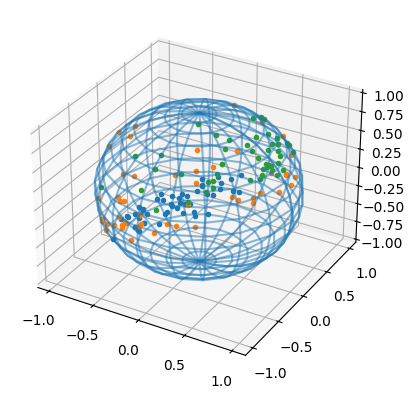

In [181]:
from mpl_toolkits.mplot3d import Axes3D
u,v = np.mgrid[0:2*np.pi:20j,0:np.pi:20j]
gx = np.cos(u)*np.sin(v)
gy = np.sin(u)*np.sin(v)
gz = np.cos(v)
f1 = plt.figure()
ax = f1.add_subplot(111,projection='3d')
ax.plot_wireframe(gx,gy,gz,alpha=0.5)

X2 = X[:,:3]
sc= pp.StandardScaler().fit(X2)
X2=sc.transform(X2)
nn=pp.Normalizer().fit(X2)
Xn=nn.transform(X2)
ax.plot(Xn[y==0,0],Xn[y==0,1],Xn[y==0,2],'.')
ax.plot(Xn[y==1,0],Xn[y==1,1],Xn[y==1,2],'.')
ax.plot(Xn[y==2,0],Xn[y==2,1],Xn[y==2,2],'.')

#### Base de Dados MNNIST: Imagens de dígitos manuscritos

In [182]:
D = pickle.load(open('MNISTsmall.p','rb'))

In [183]:
D.keys()

dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])

In [184]:
X = D['X']
y = D['trueClass']
X.shape

(784, 15000)

In [185]:
X4 = X[:,y==4]
X4.shape

(784, 1500)

dtype('float64')

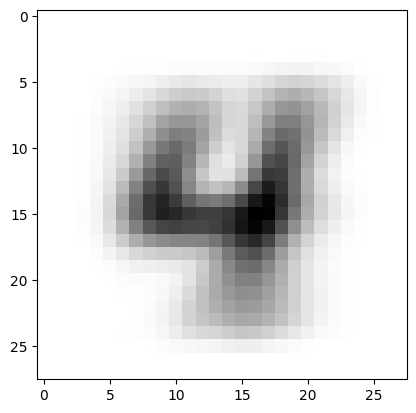

In [186]:
a = np.reshape(np.mean(X4,axis=1),(28,28))
plt.imshow(a,cmap='binary', interpolation=None)
X = X* 1.0
X.dtype

#### Matriz de Correlação

(-5.438233513624707, 5.416427156694009, -5.869031963547905, 5.890949685594633)

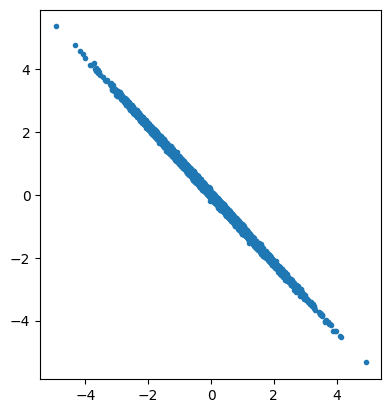

In [187]:
x = np.random.randn(2,10000)
A = np.random.randn(2,2)*2
x2 = np.dot(A,x)
plt.plot(x2[0,:],x2[1,:],'.')
plt.axis('scaled')

[[ 1.43280177 -1.56541999]
 [-1.56541999  1.71267449]]


(-16.314700540874117, 16.24928147008203, -17.607095890643716, 17.6728490567839)

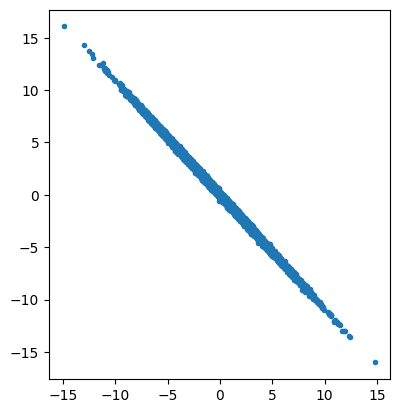

In [188]:
print(np.cov(x2))
x3 = 3*x2
plt.plot(x3[0,:],x3[1,:],'.')
plt.axis('scaled')

In [189]:
print(np.cov(x2))
print(np.cov(x3))
print(np.corrcoef(x2))
print(np.corrcoef(x3))

[[ 1.43280177 -1.56541999]
 [-1.56541999  1.71267449]]
[[ 12.89521591 -14.08877994]
 [-14.08877994  15.41407045]]
[[ 1.        -0.9993104]
 [-0.9993104  1.       ]]
[[ 1.        -0.9993104]
 [-0.9993104  1.       ]]


In [190]:
C0 = np.cov(X[:,y==0])
C1 = np.cov(X[:,y==1])
C2 = np.cov(X[:,y==2])
C3 = np.cov(X[:,y==3])
C4 = np.cov(X[:,y==4])
C5 = np.cov(X[:,y==5])
C6 = np.cov(X[:,y==6])
C7 = np.cov(X[:,y==7])
C8 = np.cov(X[:,y==8])
C9 = np.cov(X[:,y==9])

In [191]:
S0 = np.corrcoef(X[:,y==0])
S1 = np.corrcoef(X[:,y==1])
S2 = np.corrcoef(X[:,y==2])
S3 = np.corrcoef(X[:,y==3])
S4 = np.corrcoef(X[:,y==4])
S5 = np.corrcoef(X[:,y==5])
S6 = np.corrcoef(X[:,y==6])
S7 = np.corrcoef(X[:,y==7])
S8 = np.corrcoef(X[:,y==8])
S9 = np.corrcoef(X[:,y==9])

c:\Users\duart\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\duart\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(-0.5, 783.5, 783.5, -0.5)

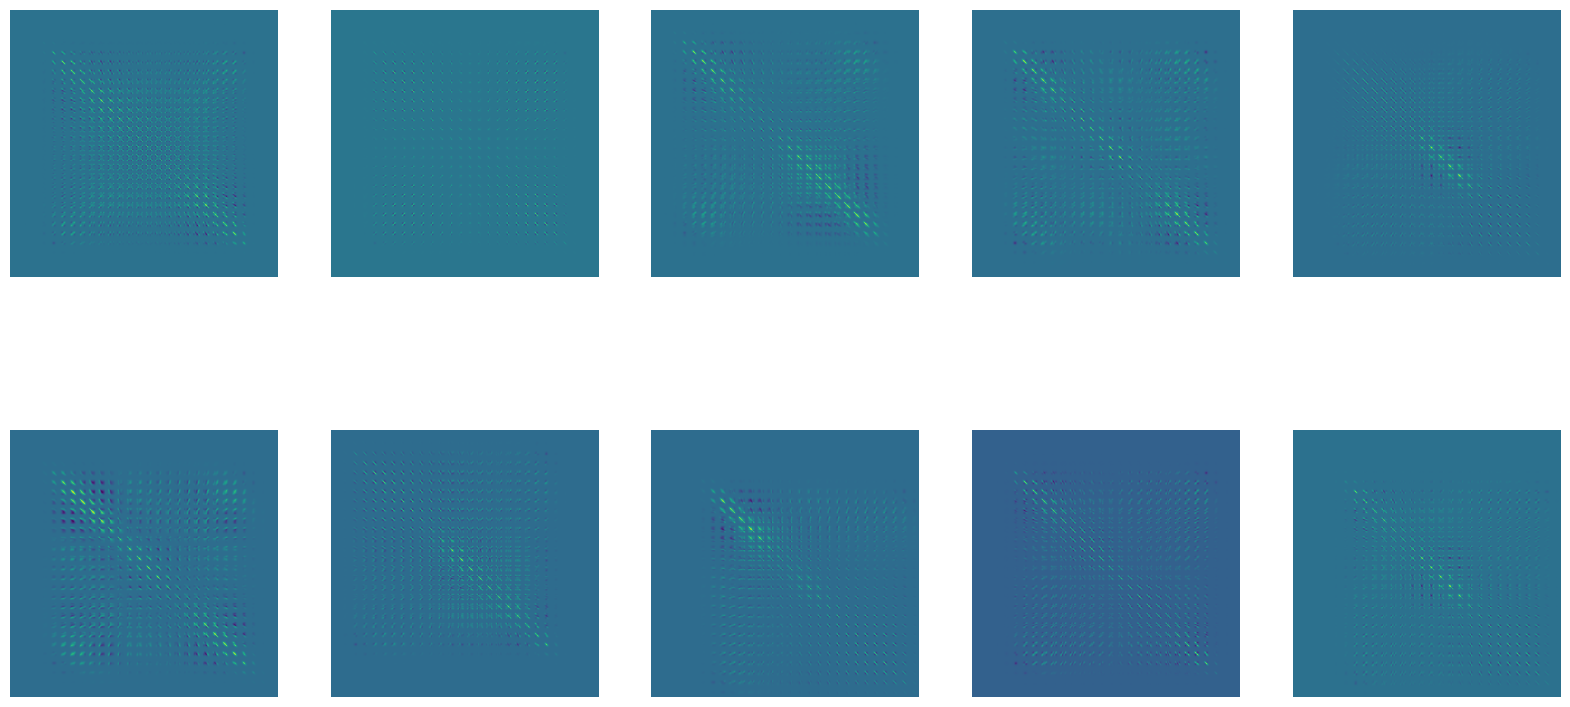

In [192]:
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
plt.imshow(C0)
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(C1)
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(C2)
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(C3)
plt.axis('off')

plt.subplot(2,5,5)
plt.imshow(C4)
plt.axis('off')

plt.subplot(2,5,6)
plt.imshow(C5)
plt.axis('off')

plt.subplot(2,5,7)
plt.imshow(C6)
plt.axis('off')

plt.subplot(2,5,8)
plt.imshow(C7)
plt.axis('off')

plt.subplot(2,5,9)
plt.imshow(C8)
plt.axis('off')

plt.subplot(2,5,10)
plt.imshow(C9)
plt.axis('off')

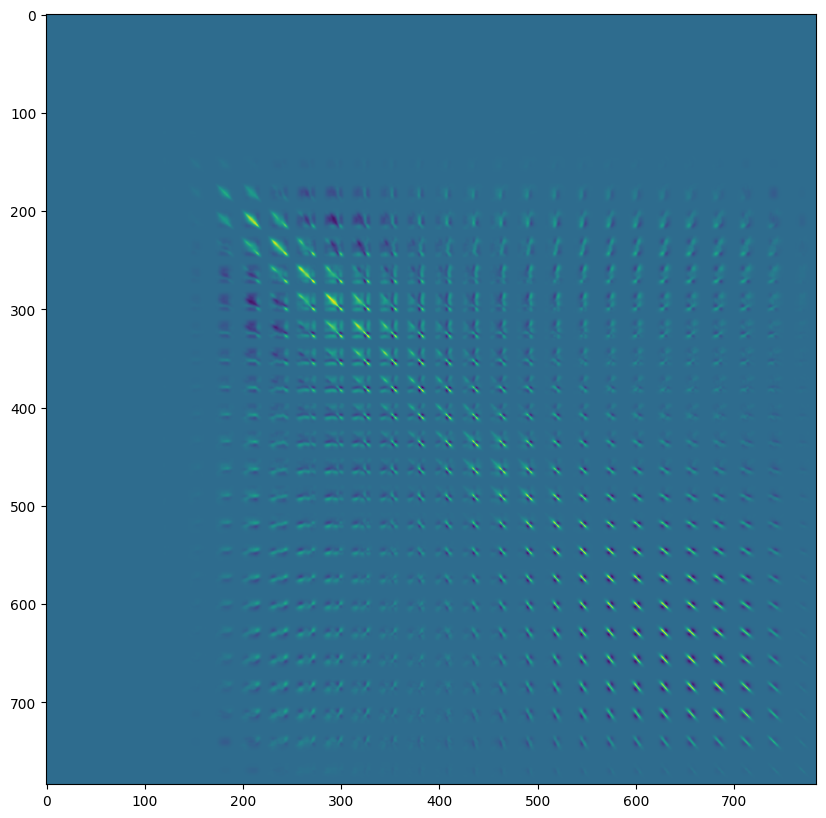

In [193]:
plt.figure(figsize=(10,10))
plt.imshow(C7)

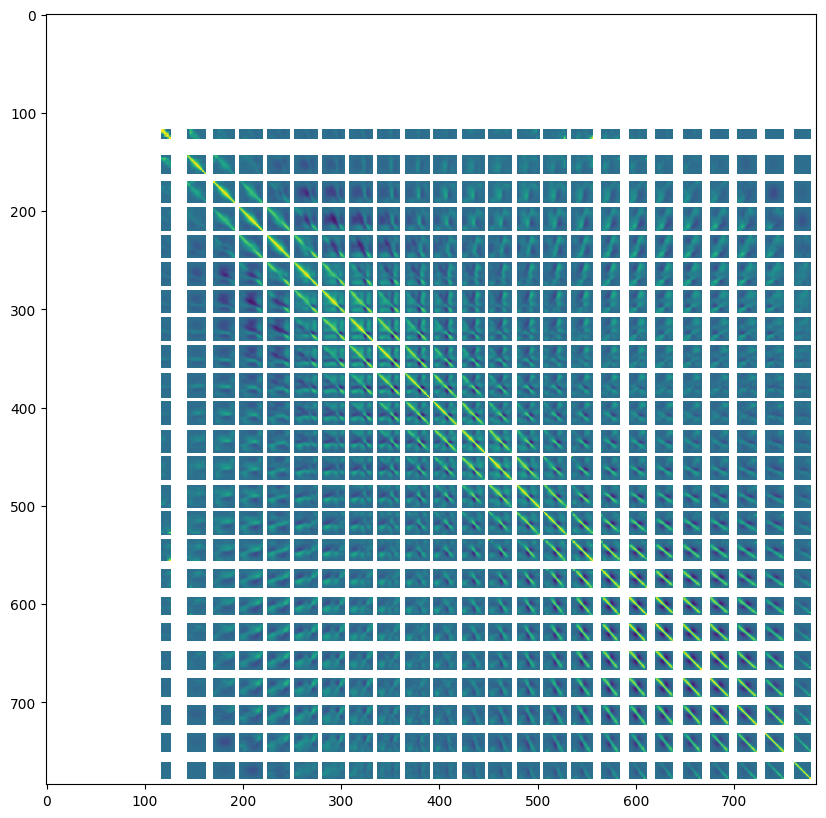

In [194]:
plt.figure(figsize=(10,10))
plt.imshow(S7)

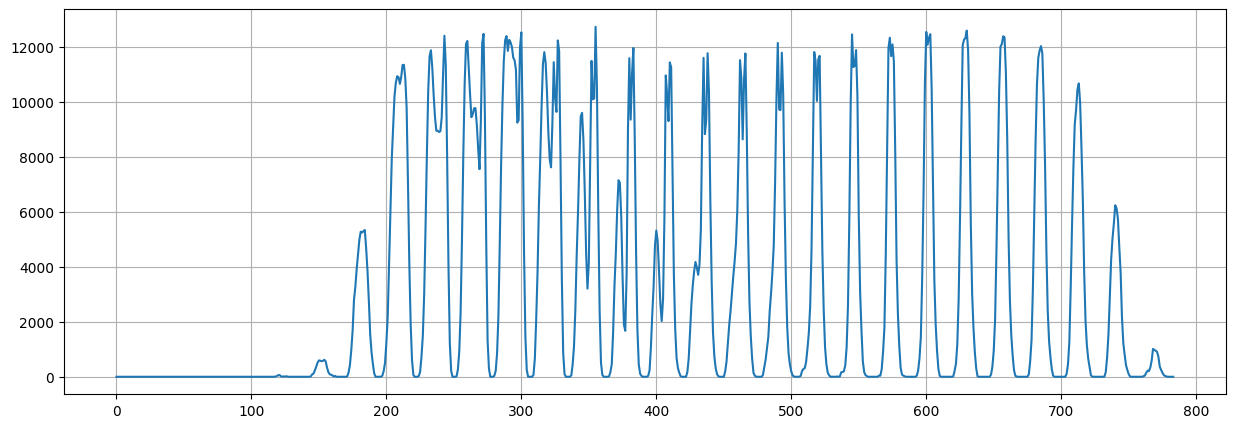

In [195]:
v = np.diag(C7)
plt.figure(figsize=(15,5))
plt.plot(v)
plt.grid(True)

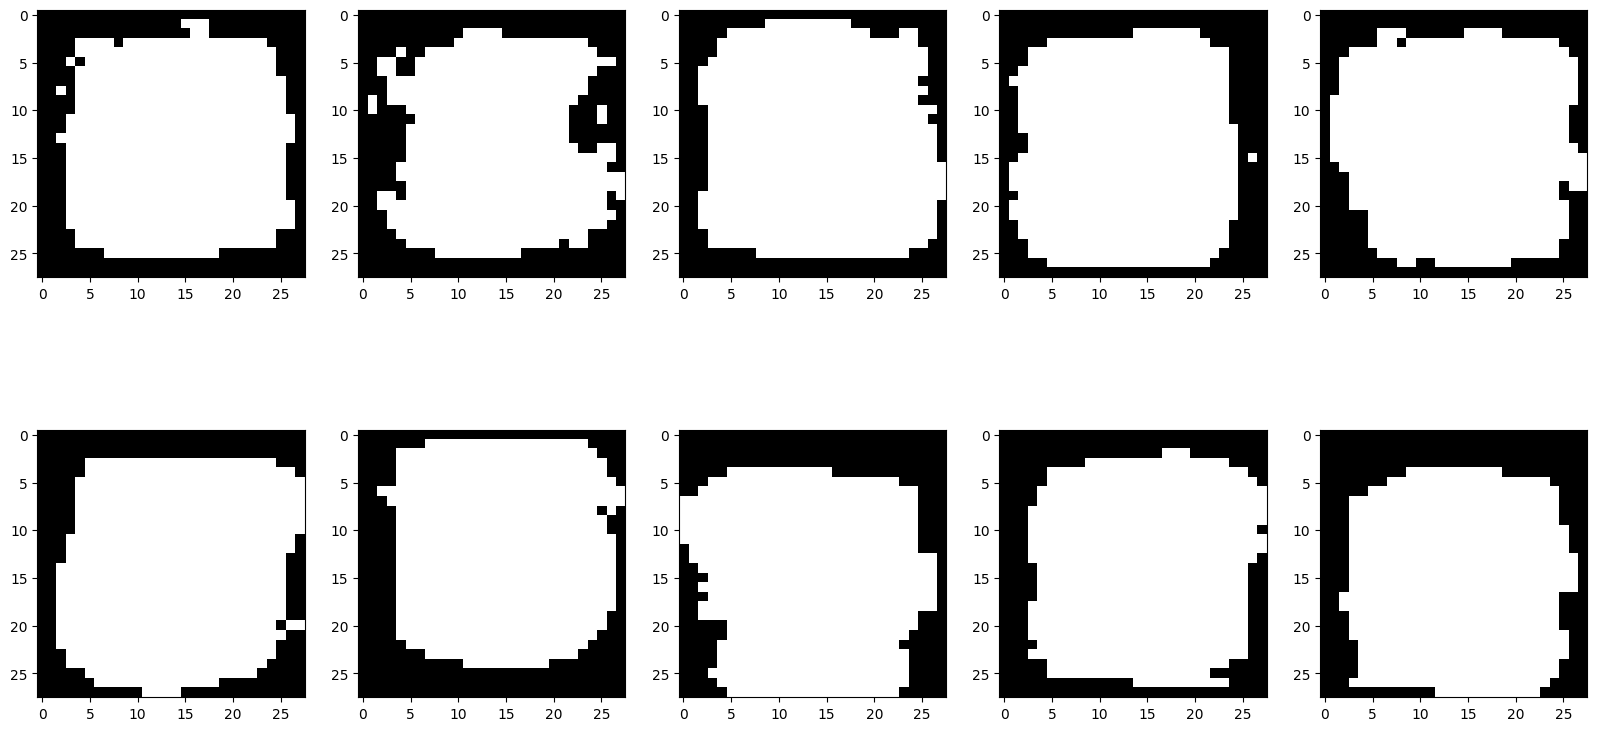

In [196]:
z0 = (np.diag(C0)!=0).reshape((28,28))
z1 = (np.diag(C1)!=0).reshape((28,28))
z2 = (np.diag(C2)!=0).reshape((28,28))
z3 = (np.diag(C3)!=0).reshape((28,28))
z4 = (np.diag(C4)!=0).reshape((28,28))
z5 = (np.diag(C5)!=0).reshape((28,28))
z6 = (np.diag(C6)!=0).reshape((28,28))
z7 = (np.diag(C7)!=0).reshape((28,28))
z8 = (np.diag(C8)!=0).reshape((28,28))
z9 = (np.diag(C9)!=0).reshape((28,28))
plt.figure(figsize=(20,10))
plt.subplot(2,5,1)
plt.imshow(z0,cmap='gray')
plt.subplot(2,5,2)
plt.imshow(z1,cmap='gray')
plt.subplot(2,5,3)
plt.imshow(z2,cmap='gray')
plt.subplot(2,5,4)
plt.imshow(z3,cmap='gray')
plt.subplot(2,5,5)
plt.imshow(z4,cmap='gray')
plt.subplot(2,5,6)
plt.imshow(z5,cmap='gray')
plt.subplot(2,5,7)
plt.imshow(z6,cmap='gray')
plt.subplot(2,5,8)
plt.imshow(z7,cmap='gray')
plt.subplot(2,5,9)
plt.imshow(z8,cmap='gray')
plt.subplot(2,5,10)
plt.imshow(z9,cmap='gray')

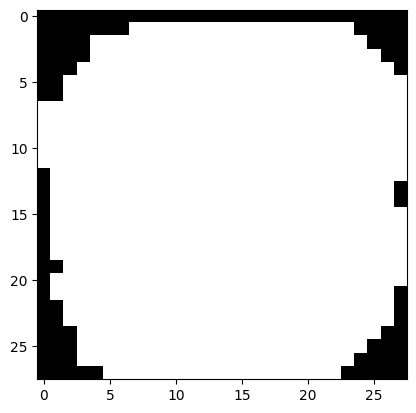

In [197]:
sc = pp.StandardScaler().fit(X.T)
X2 = sc.transform(X.T).T
v = np.var(X2,axis=1)
plt.imshow(v.reshape((28,28)),cmap='gray')

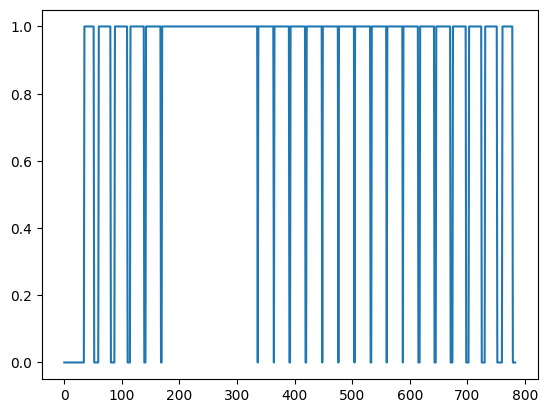

In [198]:
plt.plot(v)

#### Análise em Componentes Principais (PCA)

In [199]:
Cx = np.cov(X)
Cx.shape

(784, 784)

In [200]:
import scipy.linalg as la
u, W = la.eig(Cx)
print(u.shape)
print(W.shape)
u=u.real
W = W.real

(784,)
(784, 784)


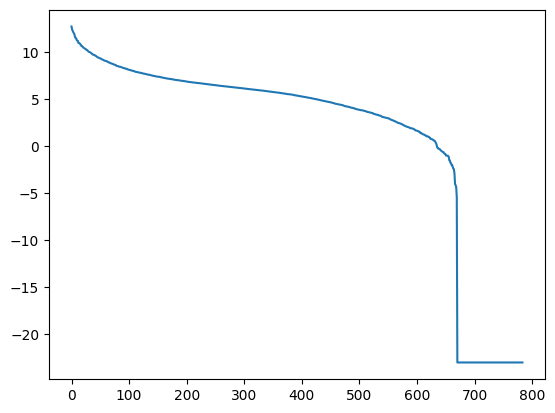

In [201]:
idx = np.argsort(-u)
u = u[idx]
W=W[:,idx]
plt.plot(np.log(u+1e-10))

In [202]:
un = u/np.sum(u)
L = np.cumsum(un)
print(np.sum(L<=0.99))

326


In [203]:
m=np.mean(X,axis=1)[:,np.newaxis]
Xn = X - m
W2 = W[:,:50]
Xp = np.dot(W2.T,Xn)
Xr = np.dot(W2,Xp)+ m

In [204]:
x = Xr[:,7000].reshape(28,28)
print(x.max() ,x.min())

288.8157982147485 -64.46284698340143


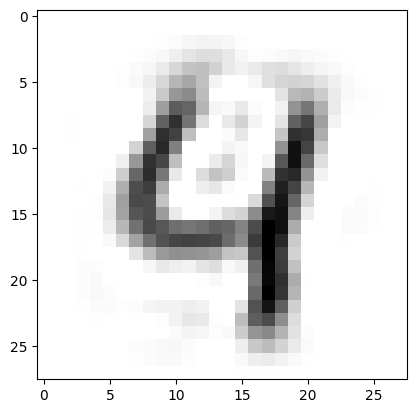

In [205]:
x=np.clip(x,0,255)
plt.imshow(x.astype('uint8'),cmap='binary')

#### Classificação com k-vizinhos + próximos

In [206]:
D.keys()

dict_keys(['foldTrain', 'trueClass', 'foldTest', 'X'])

In [207]:
f1 = D['foldTrain']
f2 = D['foldTest']
X1 = X[:,f1]
X2 = X[:,f2]
y1 = y[f1]
y2 = y[f2]


In [208]:
import scipy.linalg as la
Cx = np.cov(X1)
u, V = la.eig(Cx)
u = u.real
V = V.real

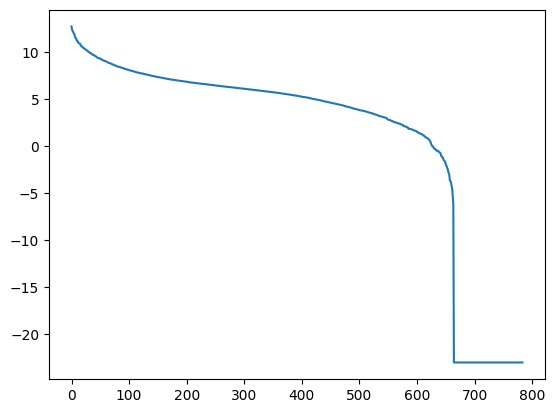

In [209]:
idx = np.argsort(-u)
u = u[idx]
V = V[:,idx]
plt.plot(np.log(u+1e-10))

In [210]:
print(np.sum(u>1e-6))
W = V[:,:np.sum(u>1e-6)]
m = np.mean(X1,axis=1)[:,np.newaxis]
X1n = X1 - m
X1p = np.dot(W.T,X1n)
s = np.std(X1p,axis=1)

664


In [211]:
Xtmp = (X1p.T/s).T
print(np.std(Xtmp,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [212]:
S = np.diag(1/s)
X1p = np.dot(S,X1p)
print(np.std(X1p,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [213]:
X2n = X2-m
X2p = np.dot(W.T,X2n)

In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from plotMatriz import plotMatriz
knn = KNeighborsClassifier(n_neighbors=1).fit(X1.T,y1)
y2e = knn.predict(X2.T)
CM = confusion_matrix(y2,y2e)
#plotMatriz(CM)
print(np.sum(y2!=y2e)/5000*100)

7.140000000000001


In [215]:
W = V[:,:100]
m = np.mean(X1,axis=1)[:,np.newaxis]
X1n = X1-m
X1p = np.dot(W.T,X1n)
X2n = X2 - m
X2p = np.dot(W.T,X2n)

knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T,y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2,y2e)
#plotMatriz(CM)
print(np.sum(y2!=y2e)/5000*100)


6.6000000000000005


In [216]:
W = V[:,:50]
m = np.mean(X1,axis=1)[:,np.newaxis]
X1n = X1-m
X1p = np.dot(W.T,X1n)
X2n = X2 - m
X2p = np.dot(W.T,X2n)

knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T,y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2,y2e)
#plotMatriz(CM)
print(np.sum(y2!=y2e)/5000*100)

6.239999999999999


In [217]:
W = V[:,:40]
m = np.mean(X1,axis=1)[:,np.newaxis]
X1n = X1-m
X1p = np.dot(W.T,X1n)
X2n = X2 - m
X2p = np.dot(W.T,X2n)

knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T,y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2,y2e)
#plotMatriz(CM)
print(np.sum(y2!=y2e)/5000*100)

5.86


In [218]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100).fit(X1.T)
X1p = pca.transform(X1.T).T
X2p = pca.transform(X2.T).T
knn = KNeighborsClassifier(n_neighbors=1).fit(X1p.T,y1)
y2e = knn.predict(X2p.T)
CM = confusion_matrix(y2,y2e)
#plotMatriz(CM)
print(np.sum(y2!=y2e)/5000*100)

6.54


#### Análise em Discriminantes Lineares (LDA)
##### Duas Classes: dígitos "0" e "1"

In [219]:
from sklearn.decomposition import PCA
import scipy.linalg as la

In [220]:
D = pickle.load(open('MNISTsmall.p','rb'))
X = D['X']*1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']
X1 = X[:,f1]
X2 = X[:,f2]
y1 = y[f1]
y2 = y[f2]

Xa = X1[:,y1==0]
Xb = X1[:,y1==1]
X01 = np.hstack((Xa,Xb))
y1 = np.hstack((np.zeros(1000),np.ones(1000)))
Xa = X2[:,y2==0]
Xb = X2[:,y2==1]
X01t = np.hstack((Xa,Xb))
y2 = np.hstack((np.zeros(500),np.ones(500)))

In [221]:
m0 = np.mean(X01[:,y1==0],axis=1)
m1 = np.mean(X01[:,y1==1],axis=1)
C0 = np.cov(X01[:,y1==0])
C1 = np.cov(X01[:,y1==1])
w = np.dot(la.pinv(C0+C1),m0-m1)

In [222]:
pca = PCA(n_components=1-1e-15,whiten=True).fit(X01.T)
X01p = pca.transform(X01.T).T
print(X01p.shape)

(500, 2000)


In [223]:
m0 = np.mean(X01p[:,y1==0],axis=1)
m1 = np.mean(X01p[:,y1==1],axis=1)
C0 = np.cov(X01p[:,y1==0])
C1 = np.cov(X01p[:,y1==1])
w = np.dot(la.inv(C0+C1),m0-m1)
w=w/np.sqrt(np.sum(w**2))

1.6653345369377348e-16


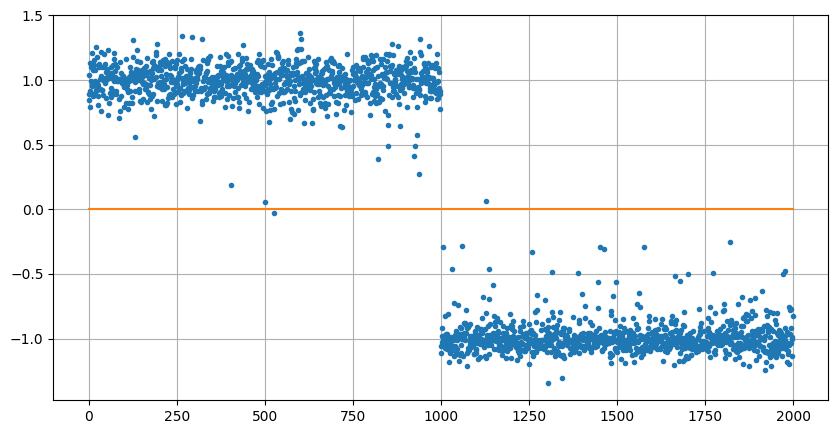

In [224]:
X01q = np.dot(w.T,X01p)
l = (np.dot(w,m0)+np.dot(w,m1))/2
print(l)
plt.figure(figsize=(10,5))
plt.plot(X01q,'.')
plt.plot([0,2000],[l,l])
plt.grid(True)

In [225]:
y1e = (X01q<0)*1
idx=np.argwhere(y1!=y1e).squeeze()
print(idx)

[ 527 1127]


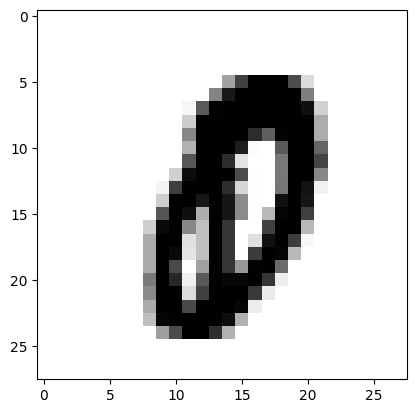

In [226]:
z = X01[:,527].reshape((28,28))
plt.imshow(z,cmap='binary')

(0.0, 1000.0, -2.0, 2.0)

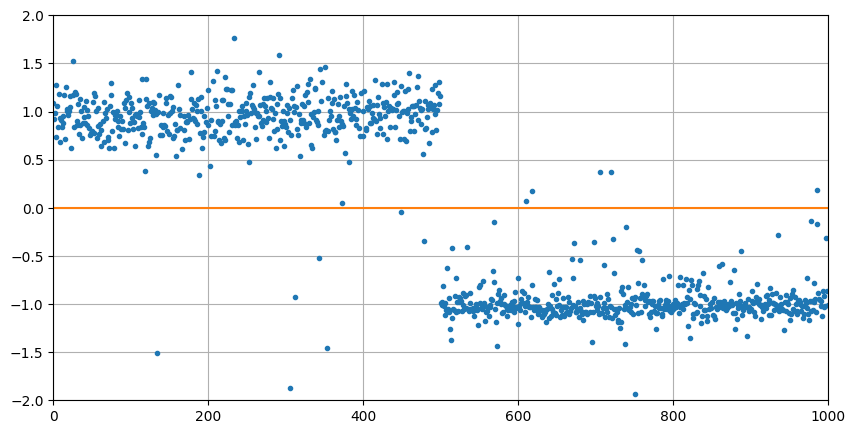

In [227]:
X01tp = pca.transform(X01t.T).T
X01tq = np.dot(w.T,X01tp)
plt.figure(figsize=(10,5))
plt.plot(X01tq,'.')
plt.plot([0,1000],[l,l])
plt.grid(True)
plt.axis([0,1000,-2,2])

In [228]:
y2e = (X01tq<0)*1
idx = np.argwhere(y2!=y2e).squeeze()
print(idx)

[ 24  63  89 134 196 205 232 306 312 343 346 348 353 402 449 478 610 617
 705 719 848 941 985]


##### LDA 5 classes: "0", "1", "2", "3" e "4"

In [229]:
D = pickle.load(open('MNISTsmall.p','rb'))
X = D['X']*1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']
X1 = X[:,f1]
X2 = X[:,f2]
y1 = y[f1]
y2 = y[f2]
idx = (y1==0) | (y1==1) | (y1==2) | (y1==3) | (y1==4)
X1 = X1[:,idx]
y1 = y1[idx]
idx = (y2==0) | (y2==1) | (y2==2) | (y2==3) | (y2==4)
X2 = X2[:,idx]
y2 = y2[idx]

In [230]:
pca = PCA(n_components=1-1e-15,whiten=True).fit(X1.T)
X1 = pca.transform(X1.T).T

In [231]:
m0 = np.mean(X1[:,y1==0],axis=1)[:,np.newaxis]
S0 = np.dot(m0,m0.T)
m1 = np.mean(X1[:,y1==1],axis=1)[:,np.newaxis]
S1 = np.dot(m1,m1.T)
m2 = np.mean(X1[:,y1==2],axis=1)[:,np.newaxis]
S2 = np.dot(m2,m2.T)
m3 = np.mean(X1[:,y1==3],axis=1)[:,np.newaxis]
S3 = np.dot(m3,m3.T)
m4 = np.mean(X1[:,y1==4],axis=1)[:,np.newaxis]
S4 = np.dot(m4,m4.T)
S = S0+S1+S2+S3+S4

In [232]:
C0 = np.cov(X1[:,y1==0])
C1 = np.cov(X1[:,y1==1])
C2 = np.cov(X1[:,y1==2])
C3 = np.cov(X1[:,y1==3])
C4 = np.cov(X1[:,y1==4])
C = C0+C1+C2+C3+C4

In [233]:
v,V = la.eig(np.dot(la.pinv(C),S))
v = v.real
V = V.real
idx = np.argsort(-v)
V = V[:,idx]
W = V[:,:4]

(4, 5000)


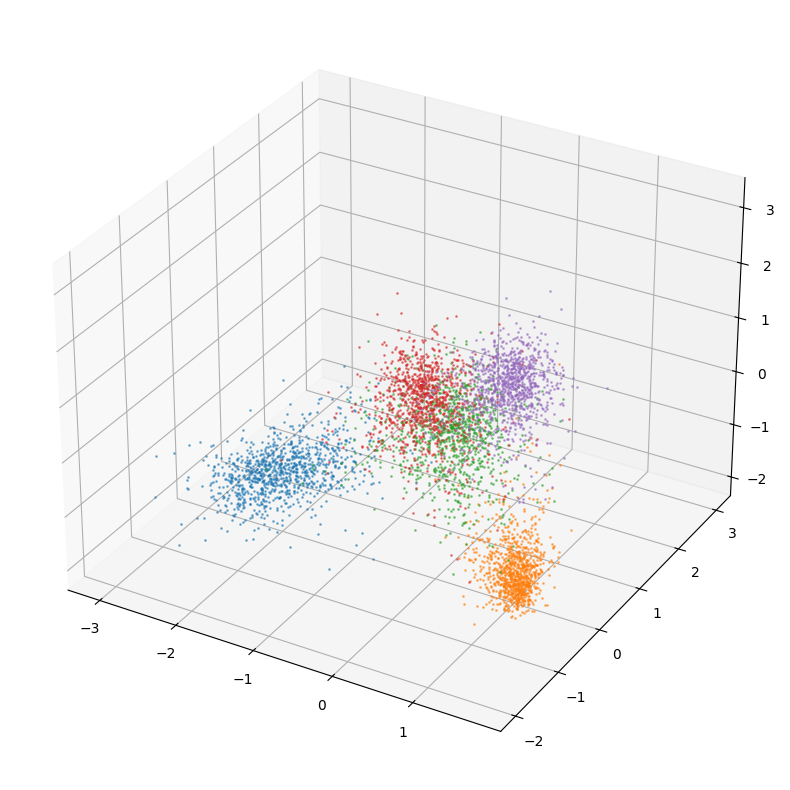

In [234]:
from matplotlib import figure
from mpl_toolkits.mplot3d import Axes3D
f1 = plt.figure(figsize=(10,10))
ax = f1.add_subplot(111,projection='3d')
X1p = np.dot(W.T,X1)
ax.plot(X1p[0,y1==0],X1p[1,y1==0],X1p[2,y1==0],'.',ms=2,alpha=.5)
ax.plot(X1p[0,y1==1],X1p[1,y1==1],X1p[2,y1==1],'.',ms=2,alpha=.5)
ax.plot(X1p[0,y1==2],X1p[1,y1==2],X1p[2,y1==2],'.',ms=2,alpha=.5)
ax.plot(X1p[0,y1==3],X1p[1,y1==3],X1p[2,y1==3],'.',ms=2,alpha=.5)
ax.plot(X1p[0,y1==4],X1p[1,y1==4],X1p[2,y1==4],'.',ms=2,alpha=.5)
print(X1p.shape)

In [241]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from plotMatriz import plotMatriz

D=pickle.load(open('MNISTsmall.p','rb'))
X = D['X']*1.0
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']
X1 = X[:,f1].T
X2 = X[:,f2].T
y1 = y[f1]
y2 = y[f2]

pca = PCA(n_components=1-1e-15).fit(X1)
X1a = pca.transform(X1)
X2a = pca.transform(X2)

In [246]:
lda = LinearDiscriminantAnalysis().fit(X1a,y1)
X1b = lda.transform(X1a)
X2b = lda.transform(X2a)

knn = KNeighborsClassifier(n_neighbors=1).fit(X1b,y1)
y2e = knn.predict(X2b)
CM = confusion_matrix(y2,y2e)
print('knn: ',np.sum(y2!=y2e), np.sum(y2!=y2e)/y2.shape[0]*100)
#plotMatriz(CM)

y2e = lda.predict(X2a)
CM = confusion_matrix(y2,y2e)
print('lda: ',np.sum(y2!=y2e), np.sum(y2!=y2e)/y2.shape[0]*100)
#plotMatriz(CM)

knn:  813 16.259999999999998
lda:  943 18.86
